<a href="https://www.kaggle.com/code/lalit7881/bmw-sales-prediction-98-57-accuracy?scriptVersionId=299624652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-global-automotive-sales/bmw_global_sales_2018_2025.csv


## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/bmw-global-automotive-sales/bmw_global_sales_2018_2025.csv')

## Top 5 values

In [3]:
df.head()

Year  Month  Region     Model  Units_Sold  Avg_Price_EUR  Revenue_EUR  \
0  2018      1  Europe  3 Series        7822          47482    371404204   
1  2018      1  Europe  5 Series       10280          61685    634121800   
2  2018      1  Europe        X3        3105          58433    181434465   
3  2018      1  Europe        X5        7420          67955    504226100   
4  2018      1  Europe        X7        8474          92300    782150200   

   BEV_Share  Premium_Share  GDP_Growth  Fuel_Price_Index  
0      0.011          19.12         3.5               1.0  
1      0.019          19.12         3.5               1.0  
2      0.022          19.12         3.5               1.0  
3      0.021          19.12         3.5               1.0  
4      0.035          19.12         3.5               1.0

## data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3072 non-null   int64  
 1   Month             3072 non-null   int64  
 2   Region            3072 non-null   object 
 3   Model             3072 non-null   object 
 4   Units_Sold        3072 non-null   int64  
 5   Avg_Price_EUR     3072 non-null   int64  
 6   Revenue_EUR       3072 non-null   int64  
 7   BEV_Share         3072 non-null   float64
 8   Premium_Share     3072 non-null   float64
 9   GDP_Growth        3072 non-null   float64
 10  Fuel_Price_Index  3072 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 264.1+ KB


## Summery

In [5]:
df.describe()

Year        Month    Units_Sold  Avg_Price_EUR   Revenue_EUR  \
count  3072.000000  3072.000000   3072.000000    3072.000000  3.072000e+03   
mean   2021.500000     6.500000   7980.288086   63854.561523  5.113995e+08   
std       2.291661     3.452615   3174.917444   14655.891299  2.431185e+08   
min    2018.000000     1.000000   2379.000000   40011.000000  1.045314e+08   
25%    2019.750000     3.750000   5225.500000   54500.250000  3.125504e+08   
50%    2021.500000     6.500000   7985.500000   63493.000000  4.808690e+08   
75%    2023.250000     9.250000  10528.250000   71489.500000  6.709141e+08   
max    2025.000000    12.000000  15914.000000   93994.000000  1.433482e+09   

         BEV_Share  Premium_Share   GDP_Growth  Fuel_Price_Index  
count  3072.000000    3072.000000  3072.000000       3072.000000  
mean      0.107572      14.660234     3.057526          1.176224  
std       0.058099       5.334604     1.018103          0.118123  
min      -0.015000       5.090000     0.100000          0.920000  
25%       0.057000      12.275000     2.370000          1.080000  
50%       0.108000      16.260000     3.060000          1.180000  
75%       0.157250      18.932500     3.852500          1.270000  
max       0.223000      20.970000     5.820000          1.410000

## Total nulls present

In [6]:
df.isnull().sum()

Year                0
Month               0
Region              0
Model               0
Units_Sold          0
Avg_Price_EUR       0
Revenue_EUR         0
BEV_Share           0
Premium_Share       0
GDP_Growth          0
Fuel_Price_Index    0
dtype: int64

## Data types

In [7]:
df.dtypes

Year                  int64
Month                 int64
Region               object
Model                object
Units_Sold            int64
Avg_Price_EUR         int64
Revenue_EUR           int64
BEV_Share           float64
Premium_Share       float64
GDP_Growth          float64
Fuel_Price_Index    float64
dtype: object

## Duplicated values

In [8]:
df.duplicated().sum()

np.int64(0)

## Total values and rows 

In [9]:
df.shape


(3072, 11)

In [10]:
df.nunique()

Year                   8
Month                 12
Region                 4
Model                  8
Units_Sold          2688
Avg_Price_EUR       2924
Revenue_EUR         3072
BEV_Share            225
Premium_Share        309
GDP_Growth           242
Fuel_Price_Index      49
dtype: int64

## columns

In [11]:
df.columns

Index(['Year', 'Month', 'Region', 'Model', 'Units_Sold', 'Avg_Price_EUR',
       'Revenue_EUR', 'BEV_Share', 'Premium_Share', 'GDP_Growth',
       'Fuel_Price_Index'],
      dtype='object')

## EDA

In [12]:
# Style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Optional: Convert Year & Month to datetime (if needed)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

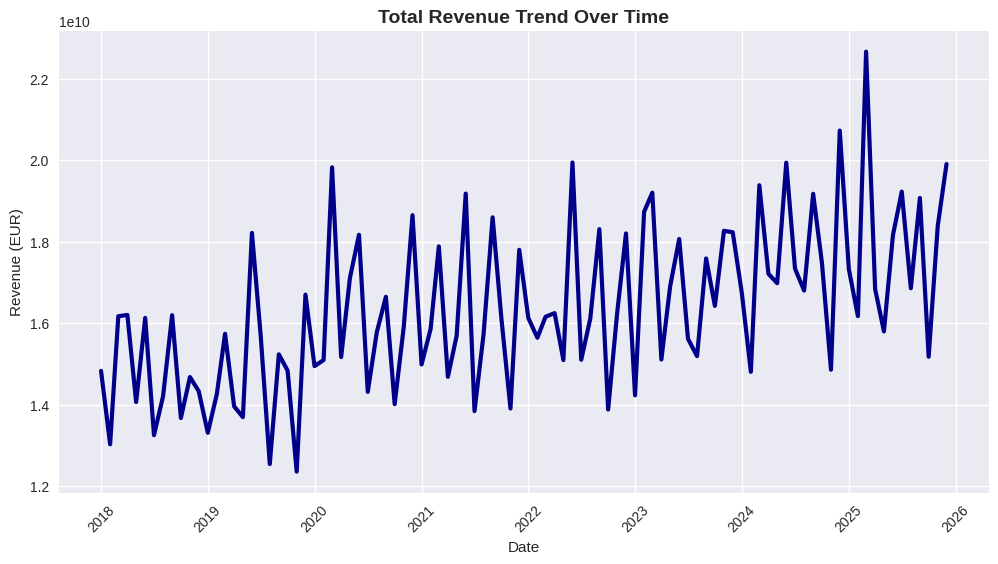

In [13]:
plt.figure(figsize=(12,6))

revenue_trend = df.groupby('Date')['Revenue_EUR'].sum().reset_index()

plt.plot(revenue_trend['Date'], revenue_trend['Revenue_EUR'],
         color='darkblue', linewidth=3)

plt.title("Total Revenue Trend Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Revenue (EUR)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

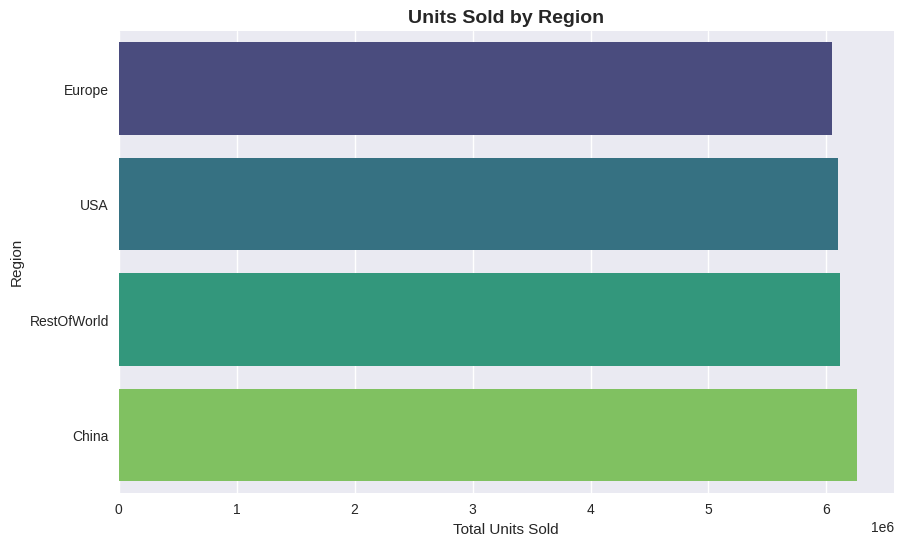

In [14]:
plt.figure(figsize=(10,6))

region_sales = df.groupby('Region')['Units_Sold'].sum().sort_values()

sns.barplot(x=region_sales.values,
            y=region_sales.index,
            palette="viridis")

plt.title("Units Sold by Region", fontsize=14, fontweight='bold')
plt.xlabel("Total Units Sold")
plt.ylabel("Region")

plt.show()

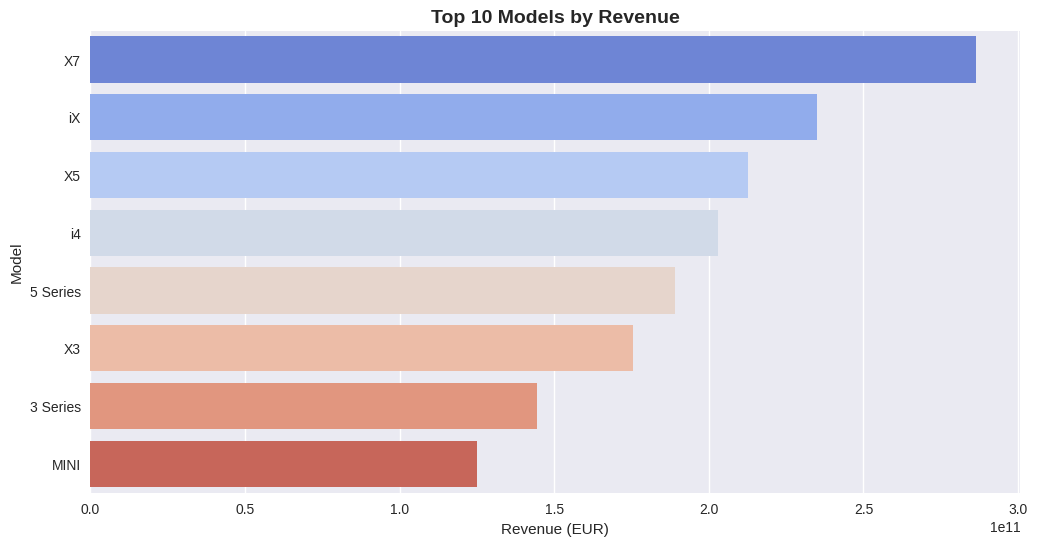

In [15]:
plt.figure(figsize=(12,6))

top_models = df.groupby('Model')['Revenue_EUR'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_models.values,
            y=top_models.index,
            palette="coolwarm")

plt.title("Top 10 Models by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Revenue (EUR)")
plt.ylabel("Model")

plt.show()

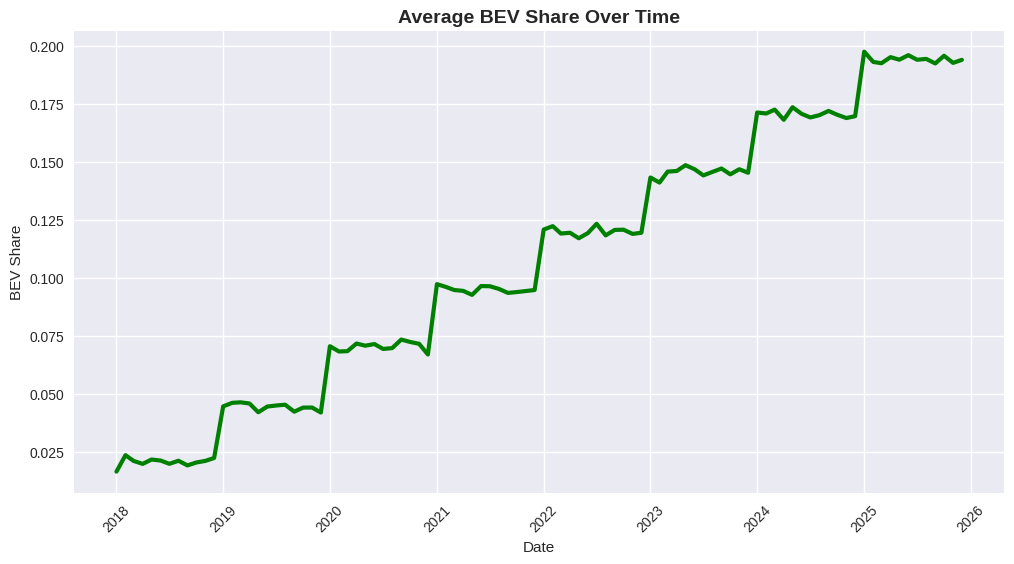

In [16]:
plt.figure(figsize=(12,6))

bev_trend = df.groupby('Date')['BEV_Share'].mean().reset_index()

plt.plot(bev_trend['Date'], bev_trend['BEV_Share'],
         color='green', linewidth=3)

plt.title("Average BEV Share Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("BEV Share")
plt.xticks(rotation=45)

plt.show()

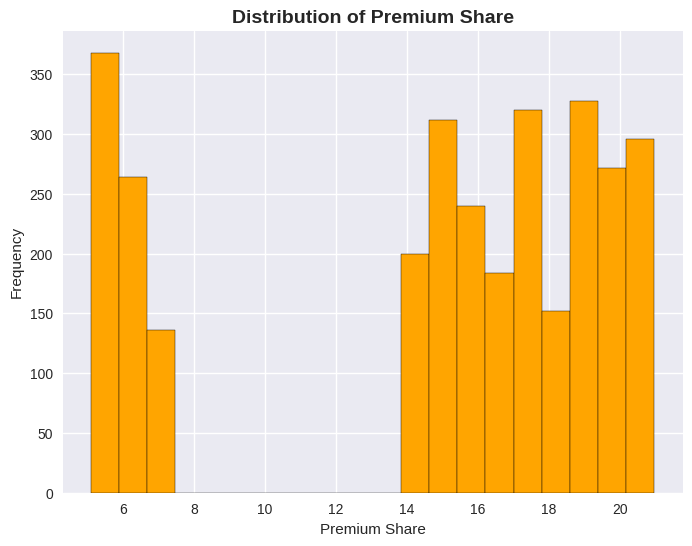

In [17]:
plt.figure(figsize=(8,6))

plt.hist(df['Premium_Share'], bins=20,
         color='orange', edgecolor='black')

plt.title("Distribution of Premium Share", fontsize=14, fontweight='bold')
plt.xlabel("Premium Share")
plt.ylabel("Frequency")

plt.show()

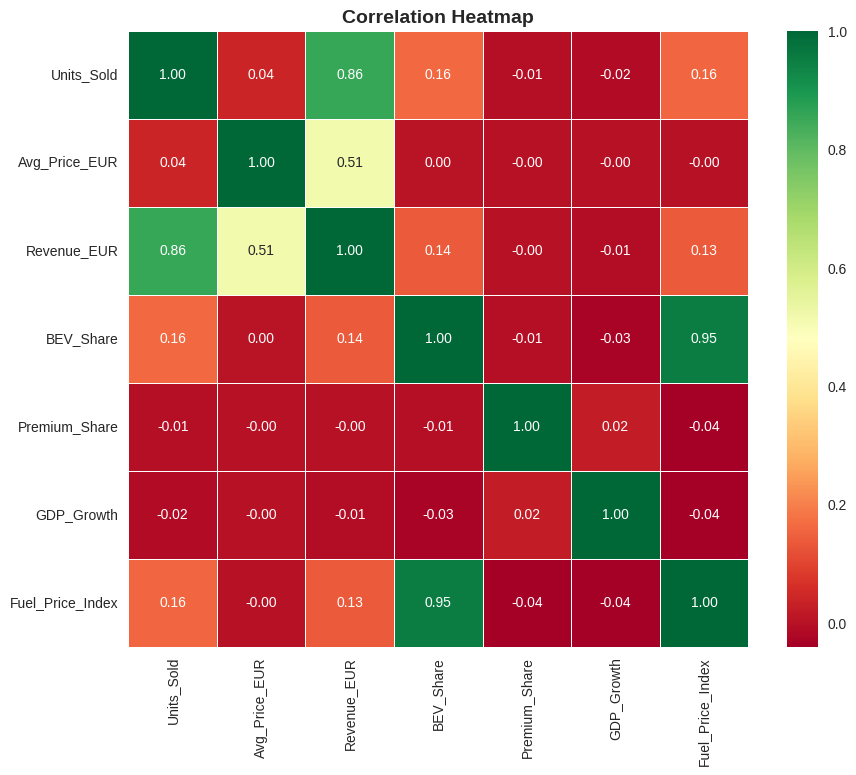

In [18]:
plt.figure(figsize=(10,8))

numeric_cols = [
    'Units_Sold', 'Avg_Price_EUR', 'Revenue_EUR',
    'BEV_Share', 'Premium_Share',
    'GDP_Growth', 'Fuel_Price_Index'
]

corr = df[numeric_cols].corr()

sns.heatmap(corr,
            annot=True,
            cmap='RdYlGn',
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')

plt.show()

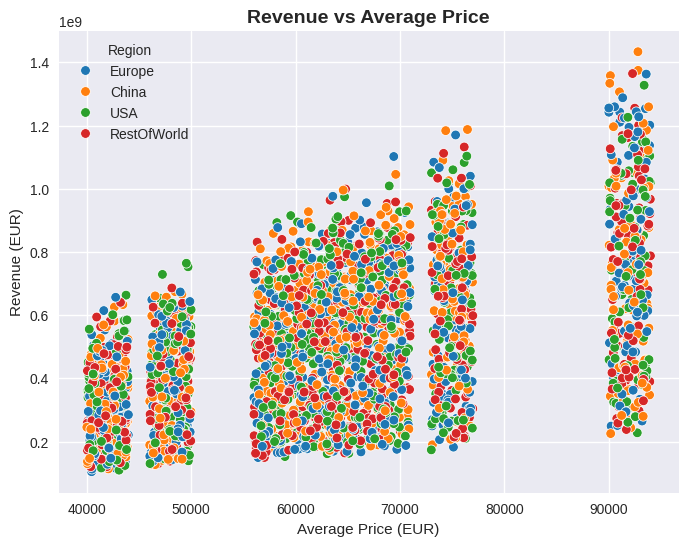

In [19]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x='Avg_Price_EUR',
                y='Revenue_EUR',
                hue='Region',
                palette='tab10')

plt.title("Revenue vs Average Price", fontsize=14, fontweight='bold')
plt.xlabel("Average Price (EUR)")
plt.ylabel("Revenue (EUR)")

plt.show()

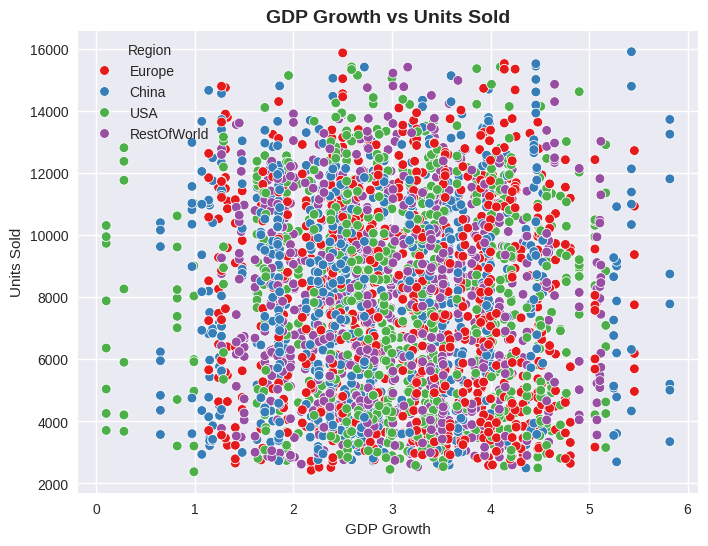

In [20]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x='GDP_Growth',
                y='Units_Sold',
                hue='Region',
                palette='Set1')

plt.title("GDP Growth vs Units Sold", fontsize=14, fontweight='bold')
plt.xlabel("GDP Growth")
plt.ylabel("Units Sold")

plt.show()

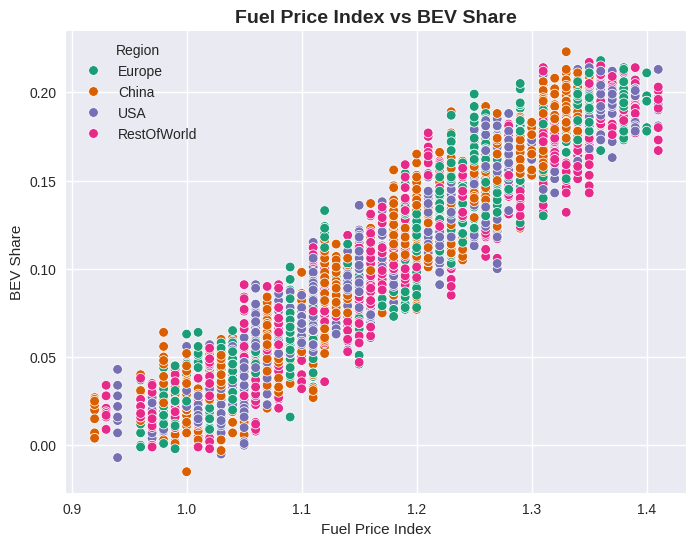

In [21]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x='Fuel_Price_Index',
                y='BEV_Share',
                hue='Region',
                palette='Dark2')

plt.title("Fuel Price Index vs BEV Share", fontsize=14, fontweight='bold')
plt.xlabel("Fuel Price Index")
plt.ylabel("BEV Share")

plt.show()

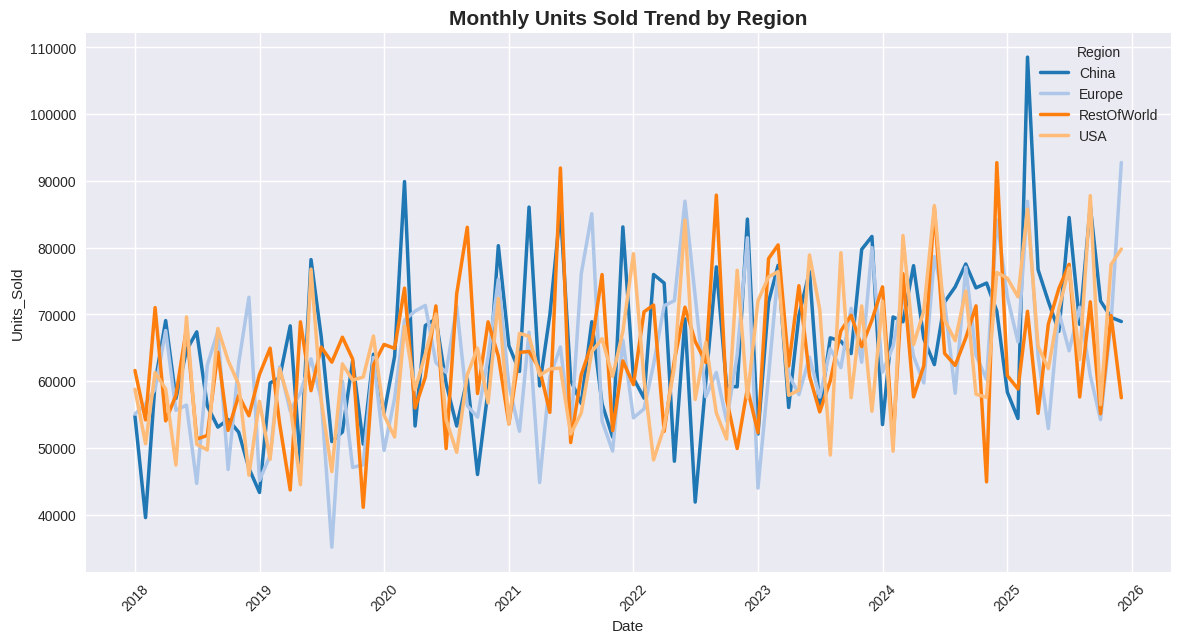

In [22]:
plt.figure(figsize=(14,7))

monthly_region = df.groupby(['Date','Region'])['Units_Sold'].sum().reset_index()

sns.lineplot(data=monthly_region,
             x='Date',
             y='Units_Sold',
             hue='Region',
             palette='tab20',
             linewidth=2.5)

plt.title("Monthly Units Sold Trend by Region", fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

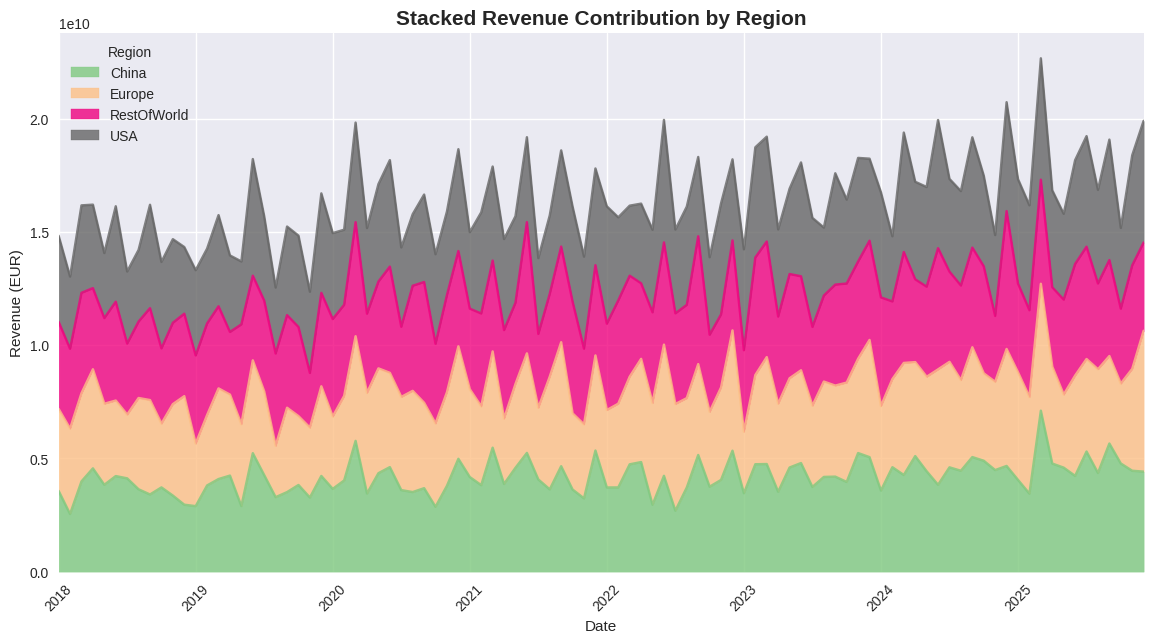

In [23]:
plt.figure(figsize=(14,7))

pivot_rev = df.pivot_table(index='Date',
                           columns='Region',
                           values='Revenue_EUR',
                           aggfunc='sum')

pivot_rev.plot(kind='area',
               stacked=True,
               colormap='Accent',
               alpha=0.8,
               figsize=(14,7))

plt.title("Stacked Revenue Contribution by Region", fontsize=15, fontweight='bold')
plt.ylabel("Revenue (EUR)")
plt.xticks(rotation=45)
plt.show()

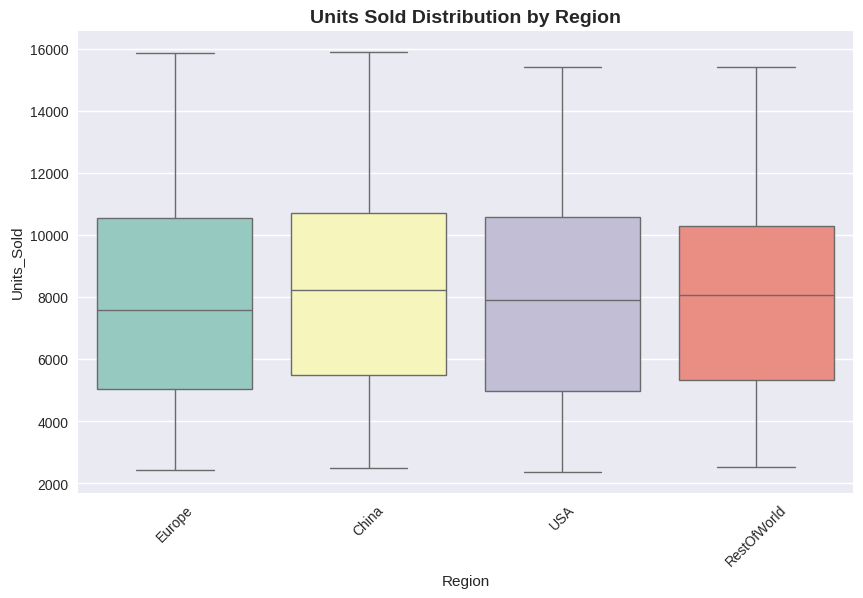

In [24]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df,
            x='Region',
            y='Units_Sold',
            palette='Set3')

plt.title("Units Sold Distribution by Region", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

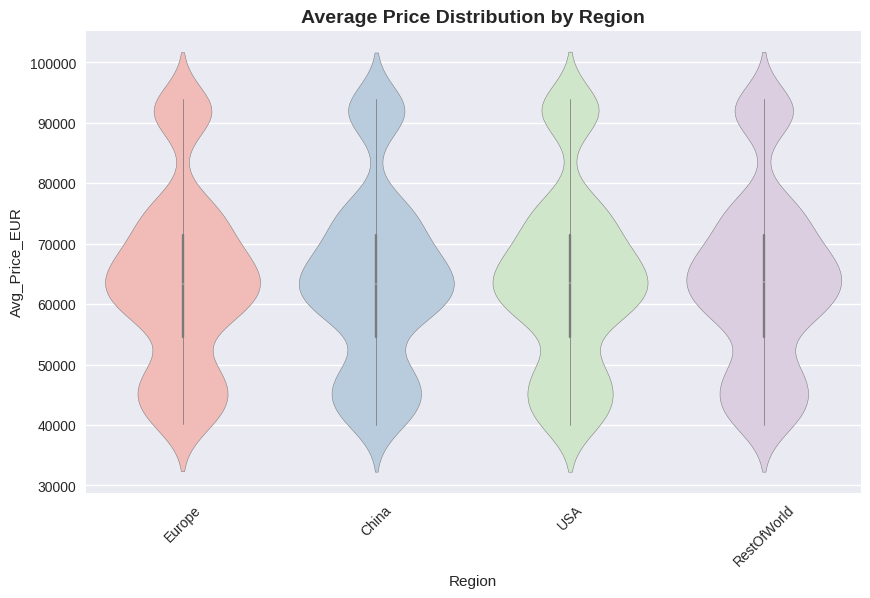

In [25]:
plt.figure(figsize=(10,6))

sns.violinplot(data=df,
               x='Region',
               y='Avg_Price_EUR',
               palette='Pastel1')

plt.title("Average Price Distribution by Region", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

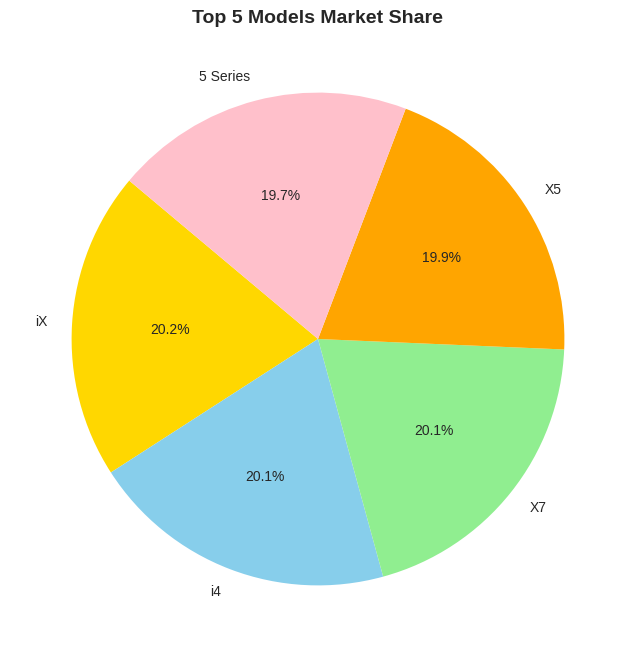

In [26]:
plt.figure(figsize=(8,8))

top5 = df.groupby('Model')['Units_Sold'].sum().sort_values(ascending=False).head(5)

colors = ['gold','skyblue','lightgreen','orange','pink']

plt.pie(top5.values,
        labels=top5.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140)

plt.title("Top 5 Models Market Share", fontsize=14, fontweight='bold')
plt.show()

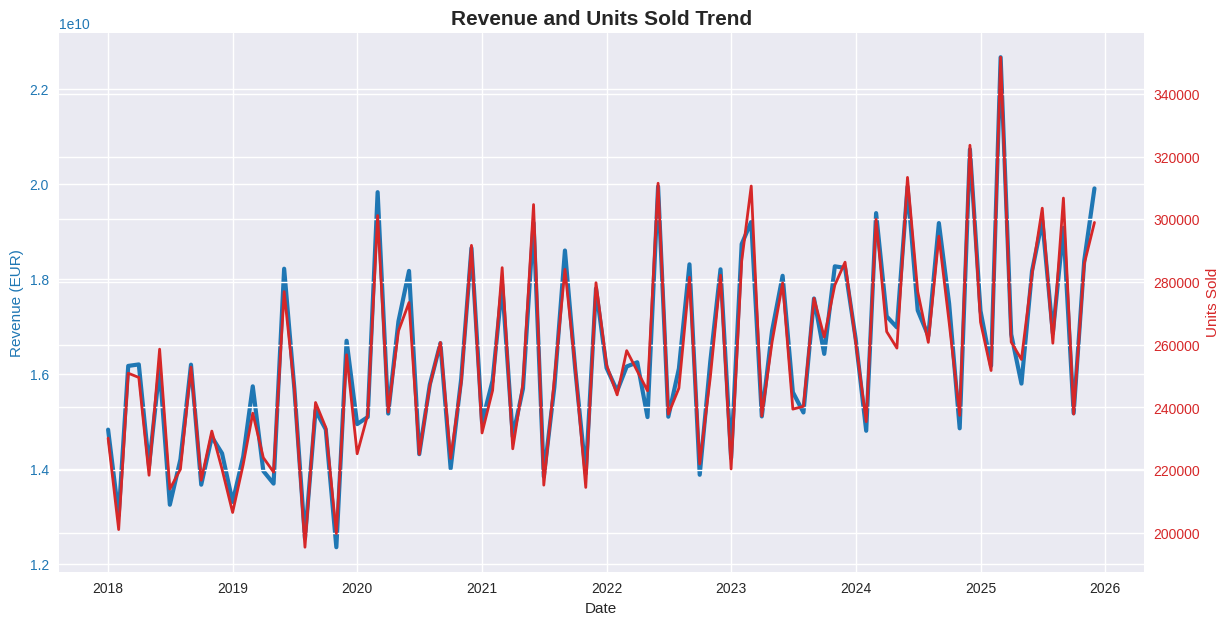

In [27]:
fig, ax1 = plt.subplots(figsize=(14,7))

monthly_data = df.groupby('Date').agg({
    'Revenue_EUR':'sum',
    'Units_Sold':'sum'
}).reset_index()

color1 = 'tab:blue'
ax1.set_xlabel("Date")
ax1.set_ylabel("Revenue (EUR)", color=color1)
ax1.plot(monthly_data['Date'], monthly_data['Revenue_EUR'],
         color=color1, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("Units Sold", color=color2)
ax2.plot(monthly_data['Date'], monthly_data['Units_Sold'],
         color=color2, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Revenue and Units Sold Trend", fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

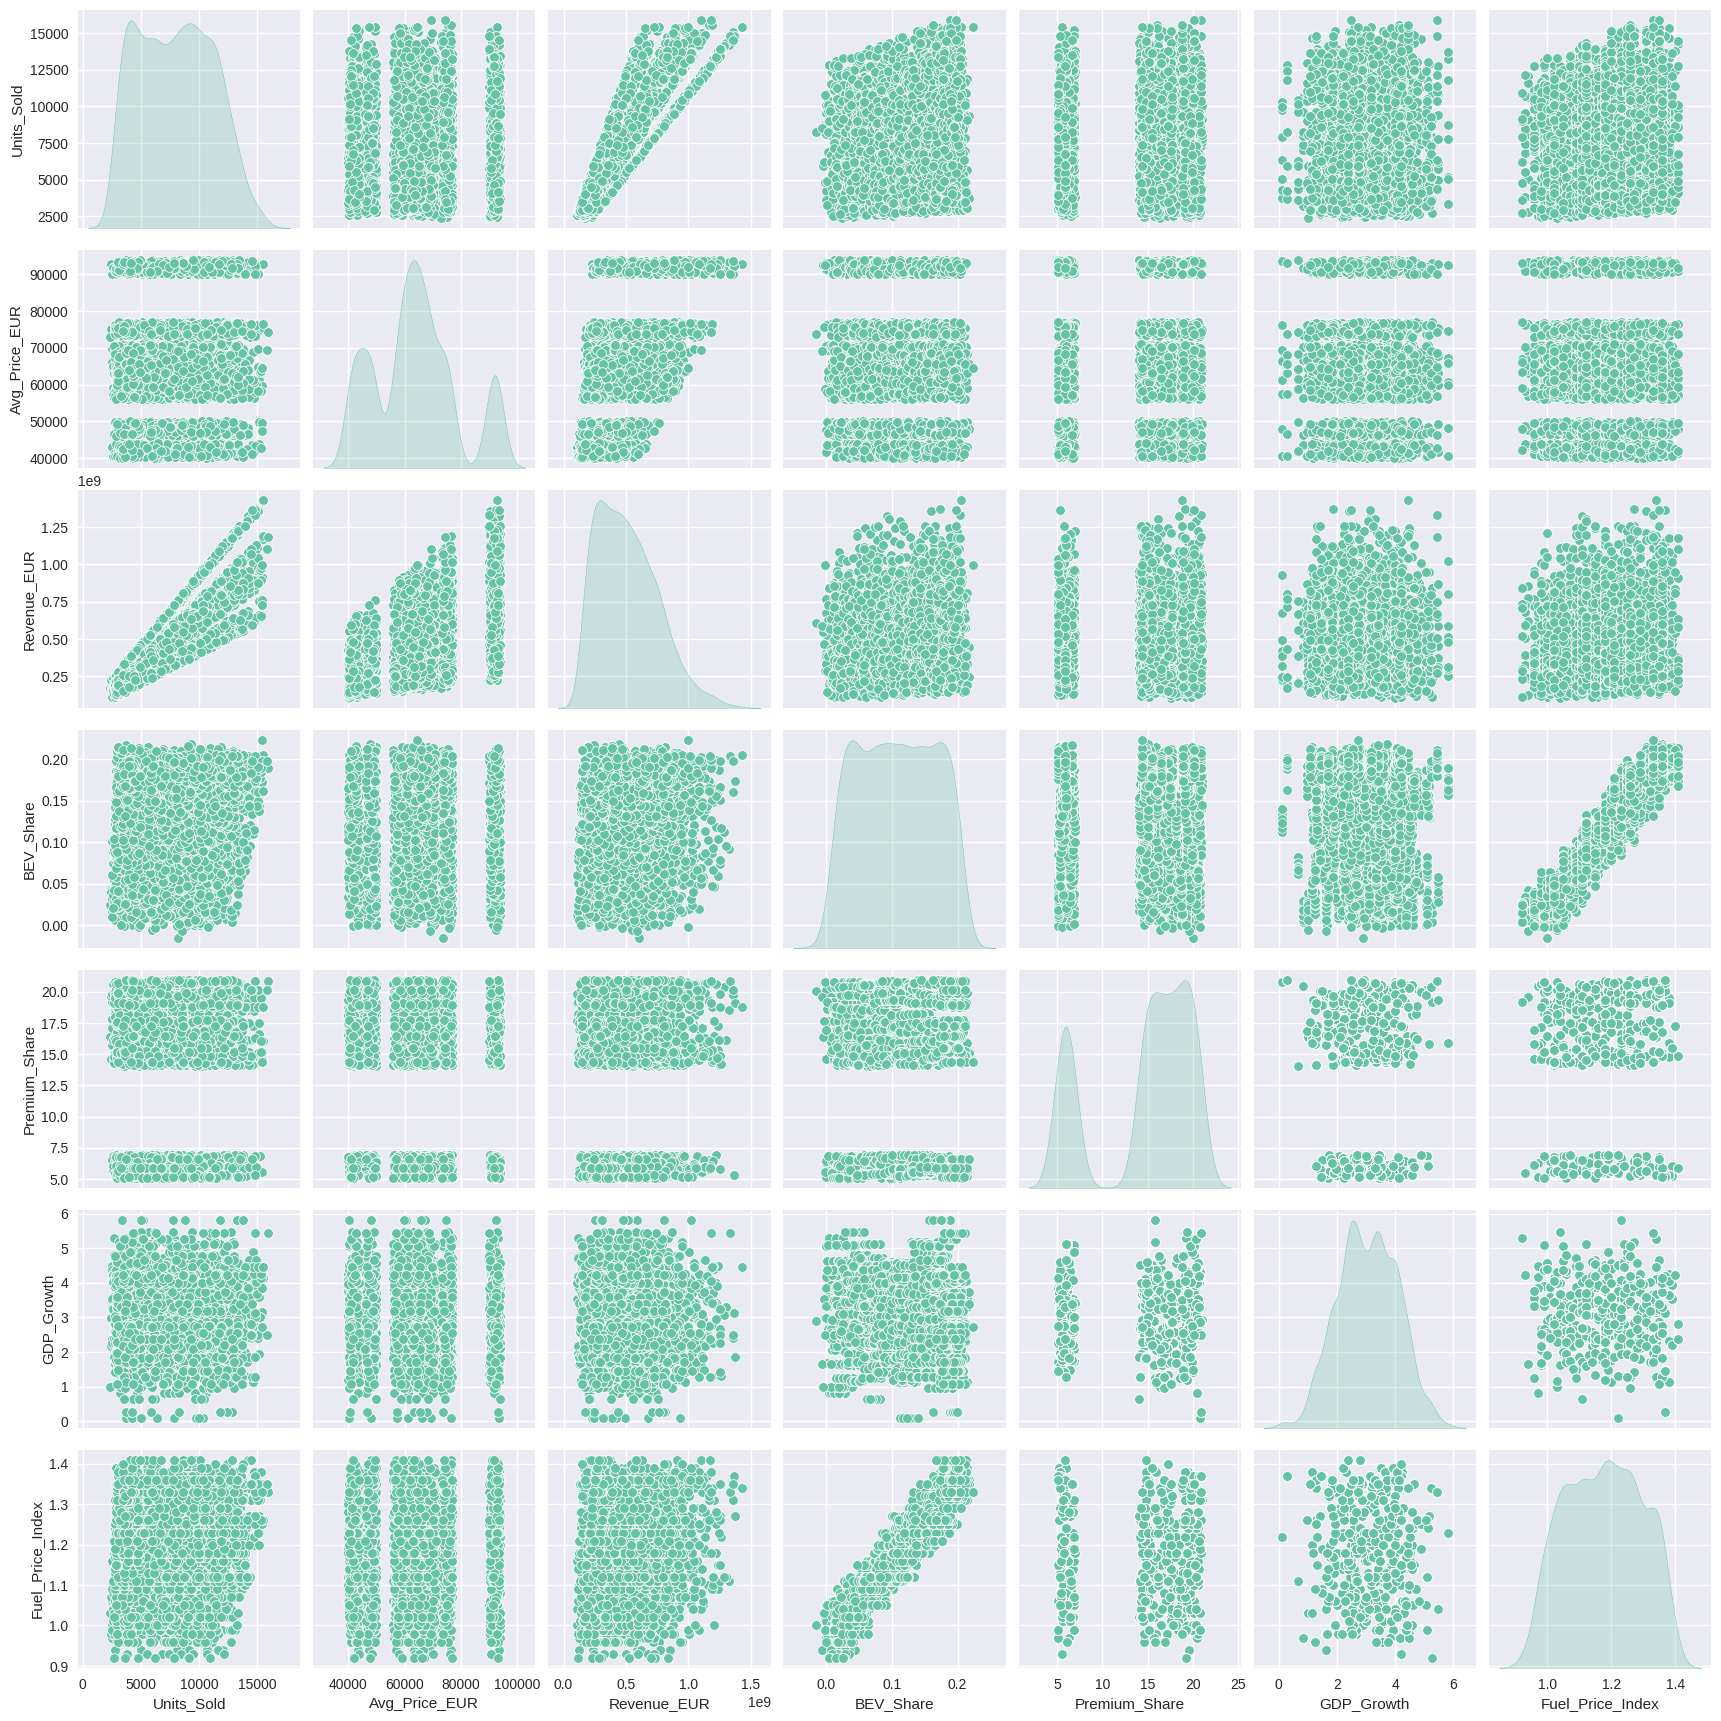

In [28]:
sns.pairplot(df[['Units_Sold','Avg_Price_EUR','Revenue_EUR',
                 'BEV_Share','Premium_Share',
                 'GDP_Growth','Fuel_Price_Index']],
             diag_kind='kde',
             palette='husl')

plt.show()

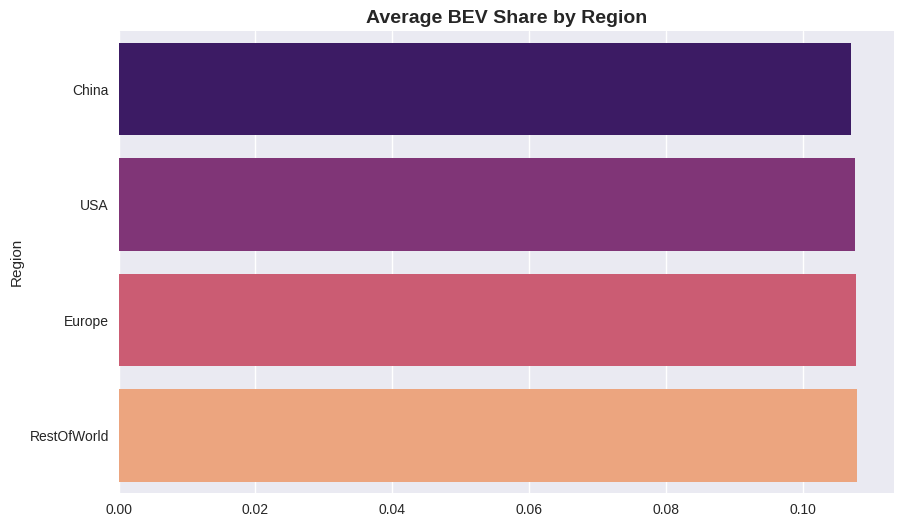

In [29]:
plt.figure(figsize=(10,6))

bev_region = df.groupby('Region')['BEV_Share'].mean().sort_values()

sns.barplot(x=bev_region.values,
            y=bev_region.index,
            palette='magma')

plt.title("Average BEV Share by Region", fontsize=14, fontweight='bold')
plt.show()

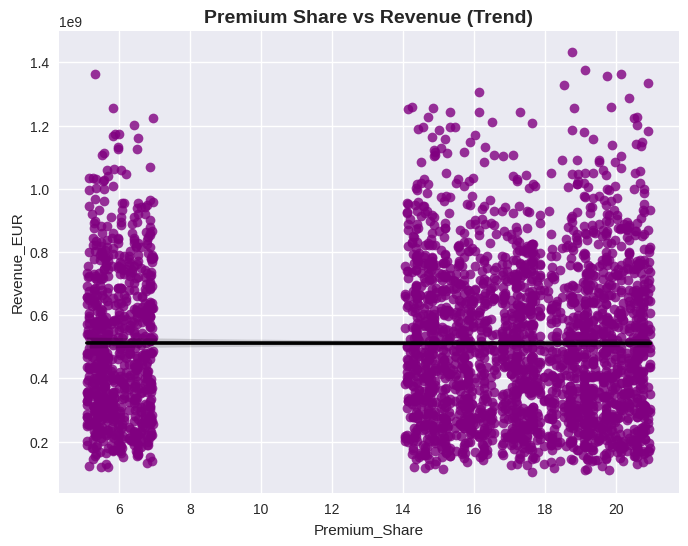

In [30]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='Premium_Share',
            y='Revenue_EUR',
            scatter_kws={'color':'purple'},
            line_kws={'color':'black'})

plt.title("Premium Share vs Revenue (Trend)", fontsize=14, fontweight='bold')
plt.show()

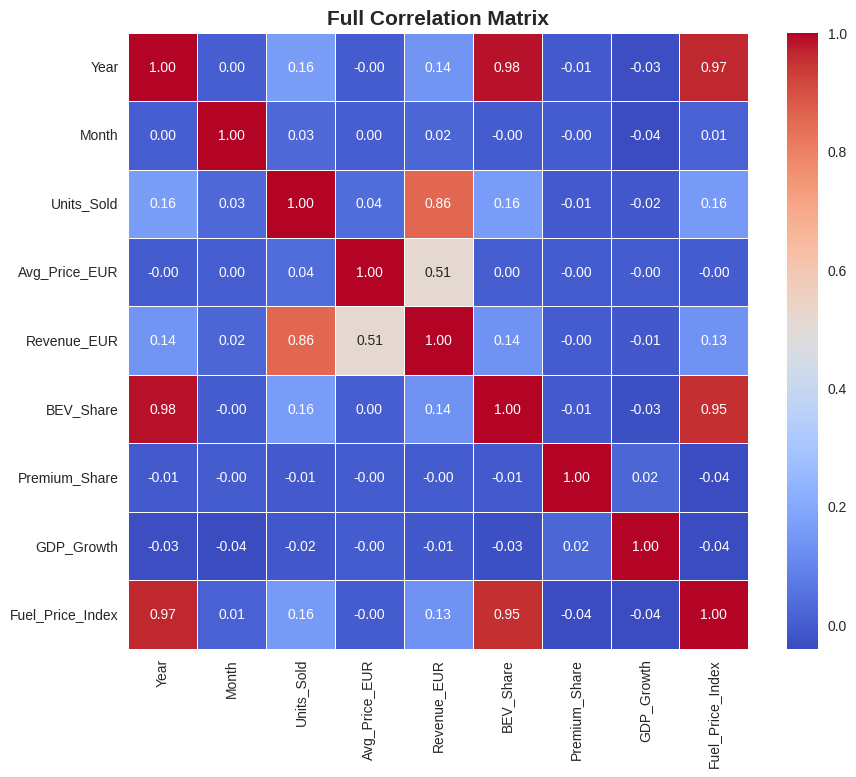

In [31]:
plt.figure(figsize=(10,8))

corr = df.corr(numeric_only=True)

sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            linecolor='white')

plt.title("Full Correlation Matrix", fontsize=15, fontweight='bold')
plt.show()

## Feature engg

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Create Target Variable

In [33]:
# Create High Revenue Target
df['High_Revenue'] = (df['Revenue_EUR'] > df['Revenue_EUR'].median()).astype(int)

## Define Features & Target

In [34]:
X = df[['Units_Sold','Avg_Price_EUR','BEV_Share',
        'Premium_Share','GDP_Growth','Fuel_Price_Index']]

y = df['High_Revenue']

## Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Feature Scaling

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Multiple ML Models

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    
    # Scale only for models that need it
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Model": model,
        "Predictions": y_pred,
        "Probabilities": y_prob
    }

## Model Performance Comparison

In [38]:
results_df = pd.DataFrame(results).T
print(results_df[['Accuracy','Precision','Recall','F1 Score']])

                     Accuracy Precision    Recall  F1 Score
Logistic Regression  0.959635  0.956853  0.964194   0.96051
Decision Tree        0.985677  0.987179  0.984655  0.985915
Random Forest        0.980469  0.984536  0.976982  0.980745
SVM                  0.977865  0.974619  0.982097  0.978344
KNN                  0.954427  0.951777  0.959079  0.955414


## Plot Accuracy Comparison

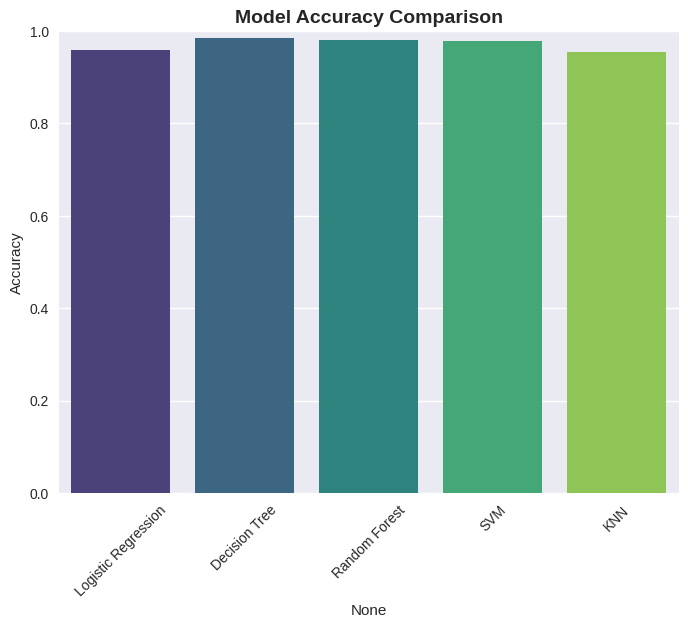

In [39]:
plt.figure(figsize=(8,6))

sns.barplot(x=results_df.index,
            y=results_df['Accuracy'],
            palette='viridis')

plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

## Confusion Matrix (Properly Fixed)

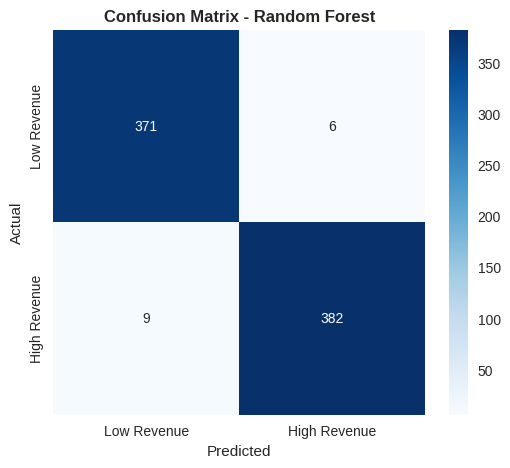

In [40]:
best_model = results["Random Forest"]["Model"]
y_pred_best = results["Random Forest"]["Predictions"]

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=["Low Revenue","High Revenue"],
            yticklabels=["Low Revenue","High Revenue"])

plt.title("Confusion Matrix - Random Forest", fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Thank you..pls upvote!!!!!